In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import f1_score

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


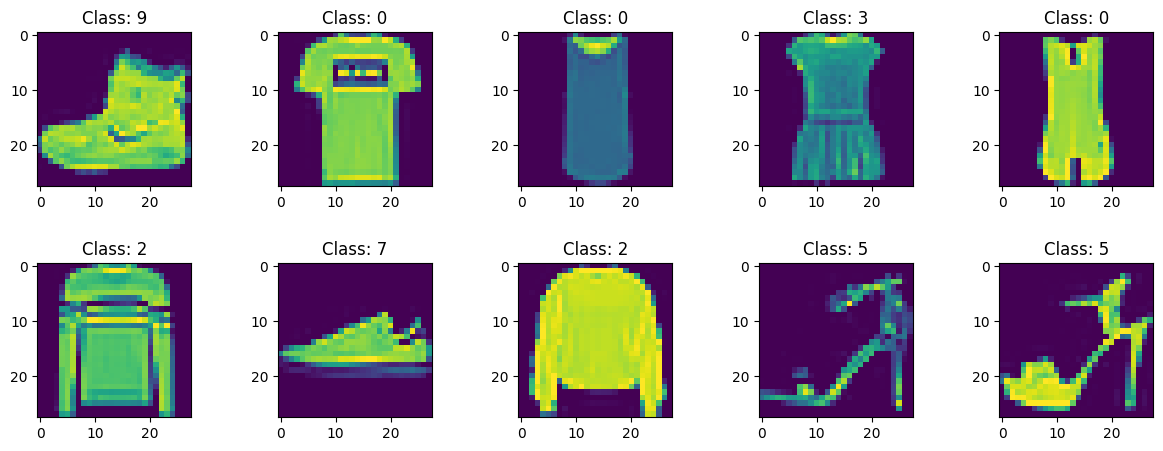

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i])
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5) 
plt.show()

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_train = minmax.fit_transform(X_train)
X_test = minmax.fit(X_test)

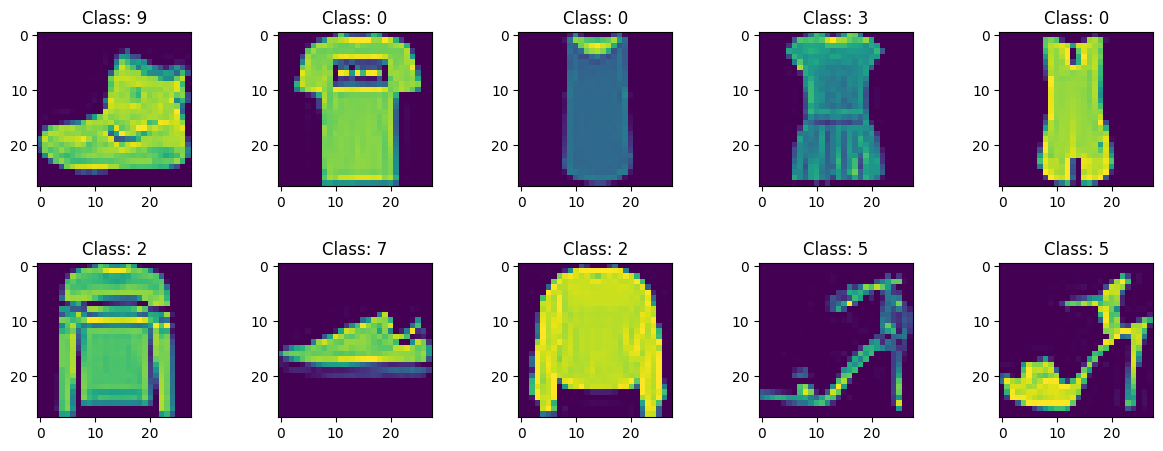

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5) 
plt.show()

In [9]:
model_1 = Sequential()

model_1.add(Dense(input_dim = X_train.shape[1], units = 256, activation='relu'))

model_1.add(Dense(units = 10, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1_fit = model_1.fit(X_train, y_train, validation_split=0.2, epochs=25, verbose=1)

Epoch 1/25
1500/1500 [==============================] - 11s 5ms/step - loss: 0.5030 - accuracy: 0.8220 - val_loss: 0.3956 - val_accuracy: 0.8565
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3762 - accuracy: 0.8643 - val_loss: 0.3629 - val_accuracy: 0.8690
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3350 - accuracy: 0.8775 - val_loss: 0.3370 - val_accuracy: 0.8782
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3081 - accuracy: 0.8868 - val_loss: 0.3464 - val_accuracy: 0.8761
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2889 - accuracy: 0.8922 - val_loss: 0.3356 - val_accuracy: 0.8754
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2741 - accuracy: 0.8979 - val_loss: 0.3211 - val_accuracy: 0.8871
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2624 - accuracy: 0.9014 - val_loss: 0.3184 - val_accuracy

In [11]:
# test_loss_model_1 = model_1.evaluate(X_test, y_test, verbose=0)

# f1_model_1 = f1_score(y_test, model_1.predict_classes(X_test), average='micro')

# stats_model_1 = {'Test accuracy' : round(test_loss_model_1[1]*100,3),'F1 score'      : round(f1_model_1,3)}

# print(stats_model_1)

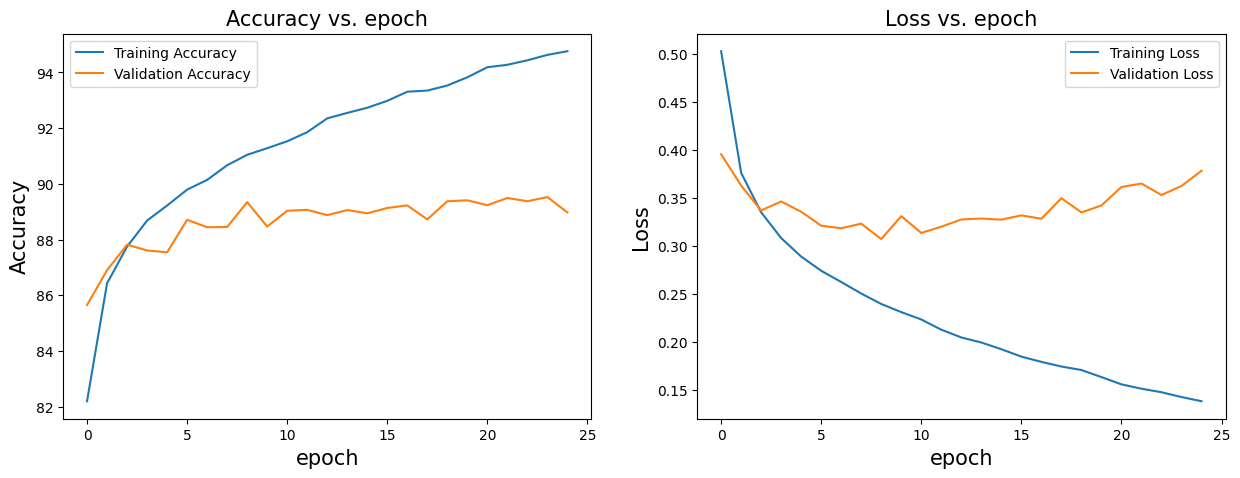

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,model_1_fit.params['epochs']), [acc * 100 for acc in model_1_fit.history['accuracy']], label='Training Accuracy')
ax[0].plot(range(0,model_1_fit.params['epochs']), [acc * 100 for acc in model_1_fit.history['val_accuracy']], label='Validation Accuracy')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

ax[1].plot(range(0,model_1_fit.params['epochs']), model_1_fit.history['loss'], label='Training Loss')
ax[1].plot(range(0,model_1_fit.params['epochs']), model_1_fit.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

plt.show()

In [13]:
def model_dropout(rate):
    model = Sequential()
    model.add(Dense(input_dim = X_train.shape[1], units = 256, activation='relu'))
    model.add(Dropout(rate = rate))
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(rate = rate))
    model.add(Dense(units = 10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=25, verbose=1)
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Training Accuracy')
    ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Validation Accuracy')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Training Loss')
    ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    plt.show()

    # test_loss_model = model.evaluate(X_test, y_test, verbose=0)

    # f1_model = f1_score(y_test, model.predict_classes(X_test), average='micro')

    # stats_model = {'Test accuracy' : round(test_loss_model[1]*100,3),'F1 score'      : round(f1_model,3)}

    # print(stats_model)
    
    #return model_fit, stats_model
    return model_fit

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1500/1500 [==========================

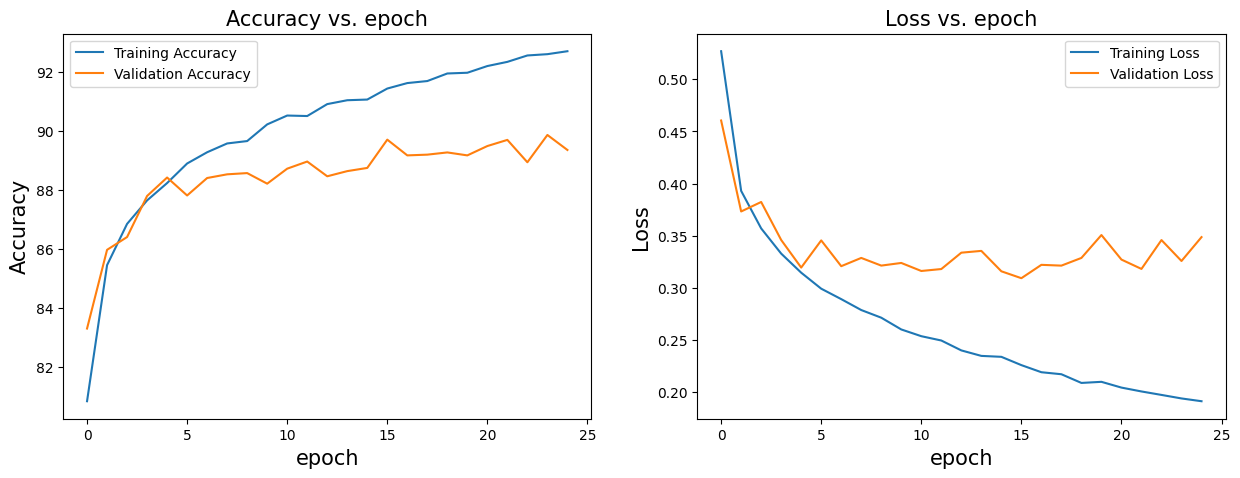

In [14]:
classifier_1d = model_dropout(0.1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1500/1500 [==========================

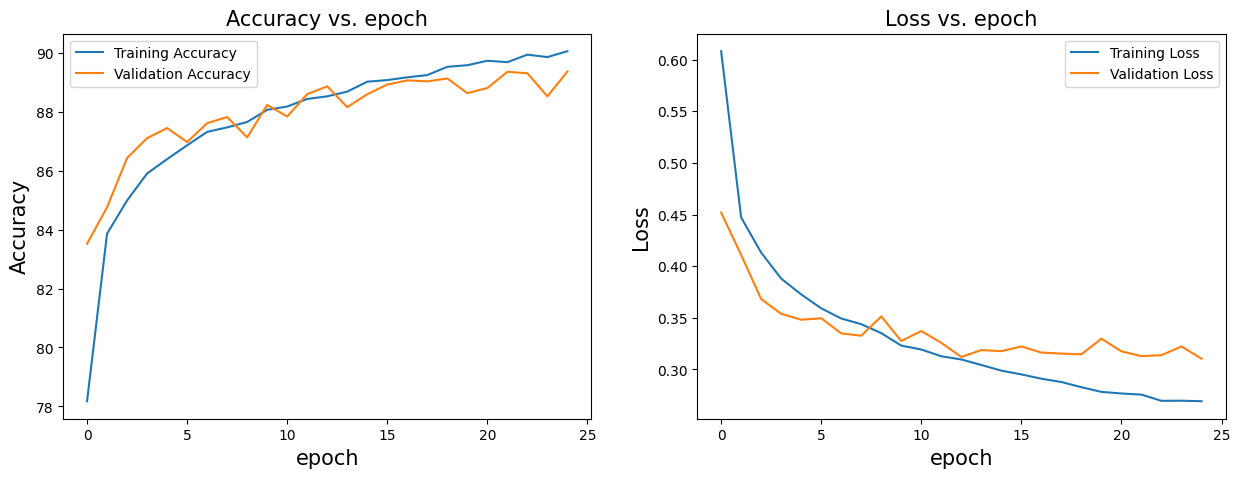

In [15]:
classifier_1d = model_dropout(0.3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1500/1500 [==========================

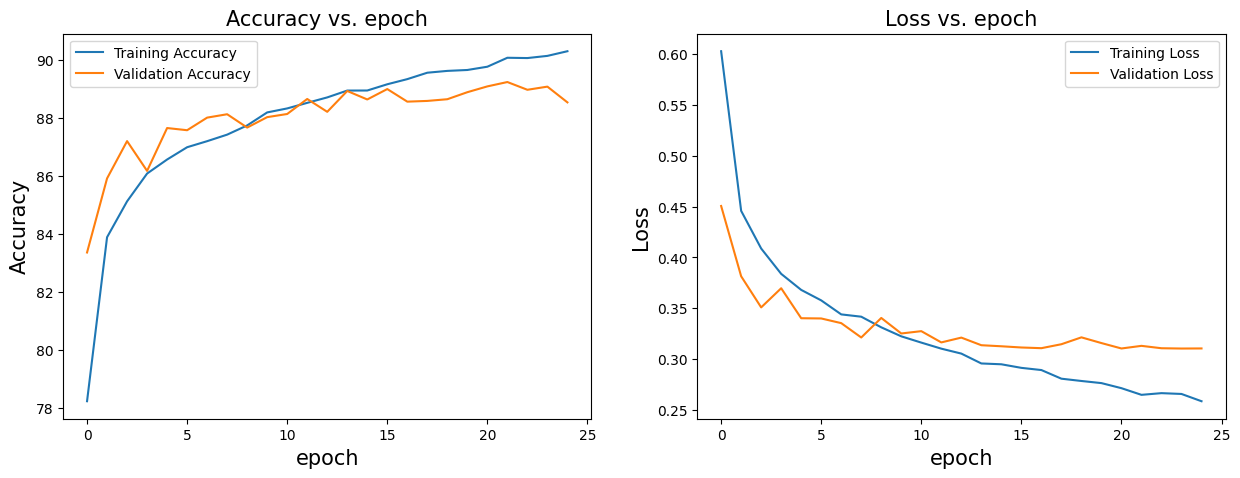

In [16]:
classifier_1d = model_dropout(0.3)

In [18]:
# x_axis = ['rate=0.1', 'rate=0.2', 'rate=0.3']
# y_axis = [stats_1d['Test accuracy'], stats_2d['Test accuracy'], stats_3d['Test accuracy']]

# plt.figure(figsize=(12,6))
# plt.bar(np.arange(len(y_axis)),y_axis)
# plt.xlabel('Dropout Rates', fontsize=15)
# plt.ylabel('Test Accuracy', fontsize=15)
# plt.ylim(min(y_axis)-1,max(y_axis)+1)
# plt.title('Bar graph for Dropout Rates vs. Test Accuracy', fontsize=15)
# plt.xticks(np.arange(len(y_axis)),x_axis)
# plt.show()

NameError: name 'stats_1d' is not defined